# **Question 3: Implementing Adaline for IRIS dataset**

## **Preparing Dataset**

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Loading dataset**

In [2]:
iris = load_iris()

features = iris.data
feature_names = iris.feature_names

labels = iris.target
label_names = iris.target_names

print("Feature Names: ", feature_names)
print("Class Names: ", label_names)

Feature Names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Class Names:  ['setosa' 'versicolor' 'virginica']


### **Selecting classes and features**

In [3]:
filter_classes = [0, 1]
filtered_indices = np.isin(labels, filter_classes)

filtered_features = features[filtered_indices, 2:4]
filtered_labels = labels[filtered_indices]


print("Filtered features (Petal Length & Width):")
print(filtered_features[1:6])
print("Filtered labels (Setosa: 0, Versicolor: 1):")
print(filtered_labels[1:6])

Filtered features (Petal Length & Width):
[[1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]]
Filtered labels (Setosa: 0, Versicolor: 1):
[0 0 0 0 0]


### **Normalizing and dividing train and test data**


In [21]:
min_values = filtered_features.min(axis=0)
print("Minimum values:")
print(min_values)
max_values = filtered_features.max(axis=0)
print("Maximum values:")
print(max_values)

normalized_features = (filtered_features - min_values) / (max_values - min_values)
print("Total dataset size:", normalized_features.shape)

X_train, X_test, y_train, y_test = train_test_split(normalized_features, filtered_labels, test_size=0.3, stratify=filtered_labels, random_state=20)

print("Training data size:", X_train.shape)
print("Test data size:", X_test.shape)

Minimum values:
[1.  0.1]
Maximum values:
[5.1 1.8]
Total dataset size: (100, 2)
Training data size: (70, 2)
Test data size: (30, 2)


## **Implementing and training the Adaline model**

### **Implementing Adaline algorithm**

In [40]:
def adaline_training(X_train, y_train, input_dim, output_dim, learning_rate=0.001, epochs=10):
    np.random.seed(20)


    weights = np.random.randn(output_dim, input_dim) * 0.01
    bias = np.random.randn(output_dim, 1) * 0.01

    errors_per_epoch = []
    accuracy_per_epoch = []
    weights_per_epoch = []
    bias_per_epoch = []

    # Convert labels to bipolar
    y_train = np.where(y_train == 0, -1, 1)

    for epoch in range(epochs):
        total_error = 0
        correct_predictions = 0

        for i in range(len(X_train)):
            x = X_train[i].reshape(1, input_dim)
            target = y_train[i].reshape(output_dim, 1)

            # Compute output
            net = np.dot(weights, x.T) + bias

            # Adaline activation
            output = 1 if net >= 0 else -1

            # Compute error
            error = target - net
            total_error += 0.5 * np.sum(error ** 2)

            # Update weights and bias
            weights += learning_rate * np.dot(error, x)
            bias += learning_rate * error

            if output == target:
                correct_predictions += 1


        errors_per_epoch.append(total_error / len(X_train))
        accuracy_per_epoch.append(100 * correct_predictions / len(X_train))
        weights_per_epoch.append(weights.copy())
        bias_per_epoch.append(bias.copy())

        print(f"Epoch {epoch + 1}/{epochs}, Error: {errors_per_epoch[-1]:.4f}, Accuracy: {accuracy_per_epoch[-1]:.4f}")

    return weights_per_epoch, bias_per_epoch, errors_per_epoch, accuracy_per_epoch

### **Training model with different learning rates**

In [57]:
learning_rates = [0.001, 0.005, 0.02]
results = {}

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")


    weights, bias, errors, accuracy = adaline_training(X_train, y_train, input_dim=2, output_dim=1, learning_rate=lr, epochs=10)

    results[lr] = {
        "weights": weights,
        "biases": bias,
        "errors": errors,
        "accuracy": accuracy
    }

Training with learning rate: 0.001
Epoch 1/10, Error: 0.4896, Accuracy: 55.7143
Epoch 2/10, Error: 0.4754, Accuracy: 51.4286
Epoch 3/10, Error: 0.4622, Accuracy: 51.4286
Epoch 4/10, Error: 0.4499, Accuracy: 57.1429
Epoch 5/10, Error: 0.4383, Accuracy: 58.5714
Epoch 6/10, Error: 0.4273, Accuracy: 65.7143
Epoch 7/10, Error: 0.4169, Accuracy: 71.4286
Epoch 8/10, Error: 0.4069, Accuracy: 80.0000
Epoch 9/10, Error: 0.3974, Accuracy: 87.1429
Epoch 10/10, Error: 0.3883, Accuracy: 91.4286
Training with learning rate: 0.005
Epoch 1/10, Error: 0.4653, Accuracy: 77.1429
Epoch 2/10, Error: 0.4089, Accuracy: 78.5714
Epoch 3/10, Error: 0.3644, Accuracy: 92.8571
Epoch 4/10, Error: 0.3267, Accuracy: 95.7143
Epoch 5/10, Error: 0.2938, Accuracy: 98.5714
Epoch 6/10, Error: 0.2646, Accuracy: 100.0000
Epoch 7/10, Error: 0.2387, Accuracy: 100.0000
Epoch 8/10, Error: 0.2156, Accuracy: 100.0000
Epoch 9/10, Error: 0.1950, Accuracy: 100.0000
Epoch 10/10, Error: 0.1766, Accuracy: 100.0000
Training with learning 

## **Analizing the results**

### **Illustrating decision boundaries**

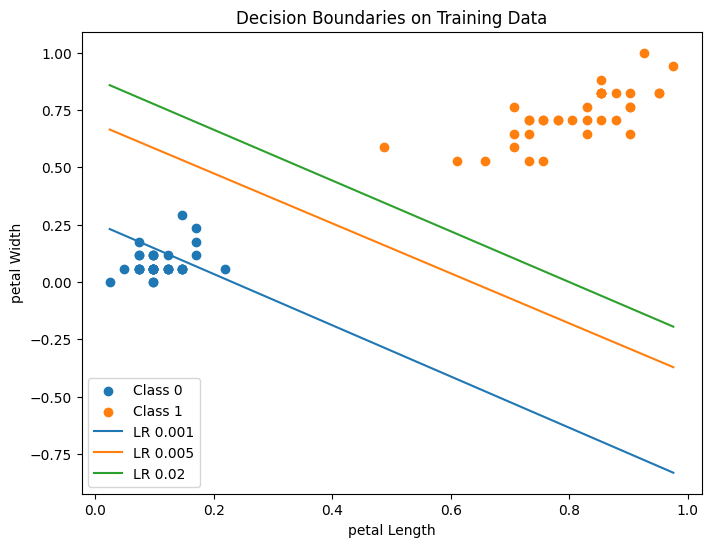

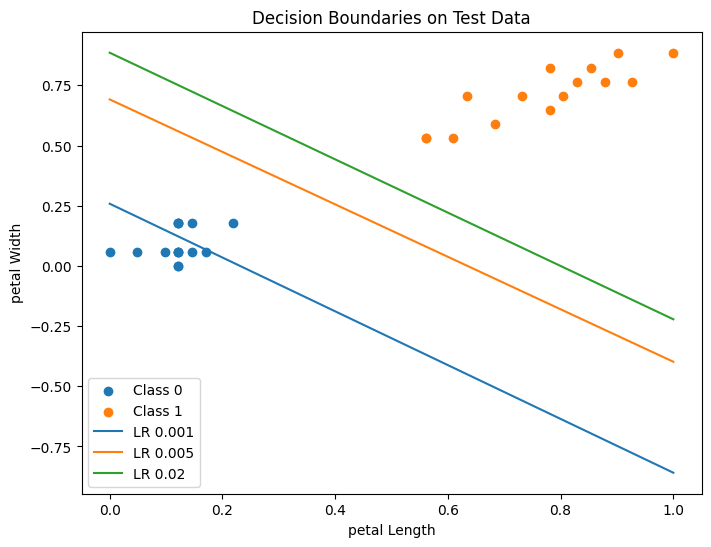

In [58]:
def plot_decision_boundaries(X, y, weights, biases, title, learning_rates):
    plt.figure(figsize=(8, 6))

    for class_label in np.unique(y):
        plt.scatter(X[y == class_label, 0], X[y == class_label, 1], label=f"Class {class_label}")

    x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)

    for i, lr in enumerate(learning_rates):
        w = weights[i]
        b = biases[i]

        if w[0, 1] != 0:
            y_vals = -(w[0, 0] * x_vals + b[0, 0]) / w[0, 1]
            plt.plot(x_vals, y_vals, label=f"LR {lr}")

    plt.xlabel("petal Length")
    plt.ylabel("petal Width")
    plt.legend()
    plt.title(title)
    plt.show()

final_weights = [results[lr]["weights"][-1] for lr in learning_rates]
final_biases = [results[lr]["biases"][-1] for lr in learning_rates]

plot_decision_boundaries(X_train, y_train, final_weights, final_biases, "Decision Boundaries on Training Data", learning_rates)
plot_decision_boundaries(X_test, y_test, final_weights, final_biases, "Decision Boundaries on Test Data", learning_rates)


### **Plotting error and accuracy**

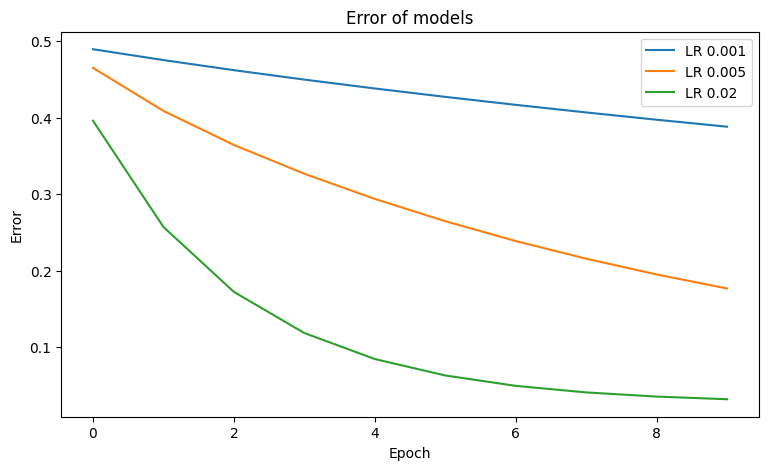

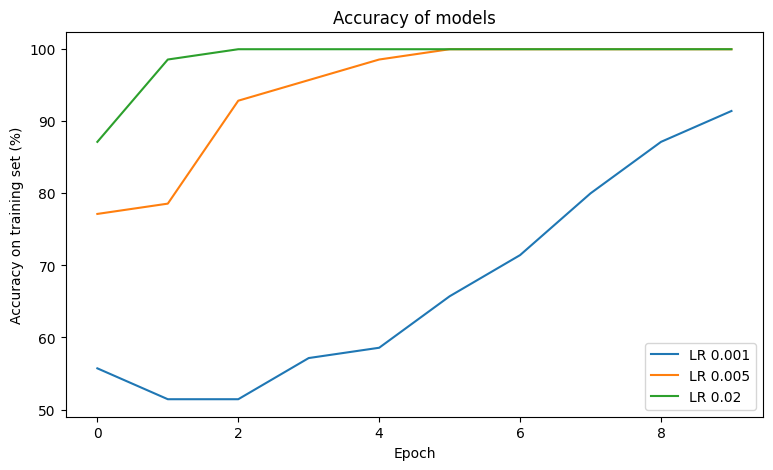

In [59]:
plt.figure(figsize=(9, 5))
for lr in learning_rates:
    plt.plot(results[lr]["errors"], label=f"LR {lr}")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Error of models")
plt.legend()
plt.show()

plt.figure(figsize=(9, 5))
for lr in learning_rates:
    plt.plot(results[lr]["accuracy"], label=f"LR {lr}")
plt.xlabel("Epoch")
plt.ylabel("Accuracy on training set (%)")
plt.title("Accuracy of models")
plt.legend()
plt.show()

### **Showing the progress of each model**

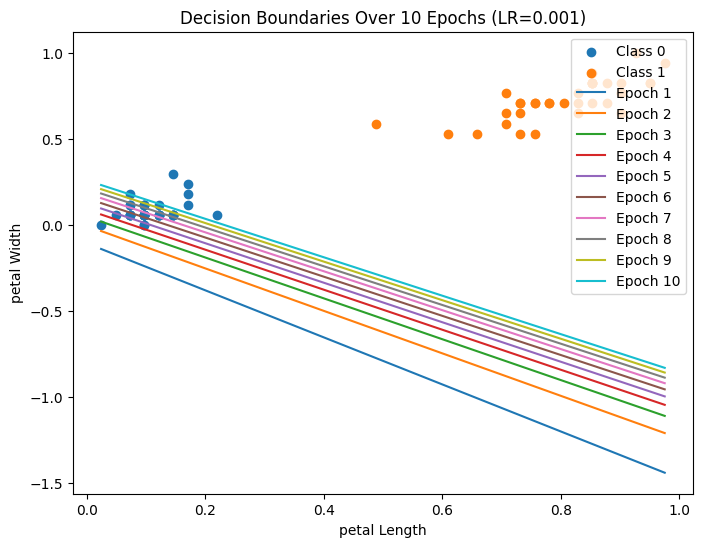

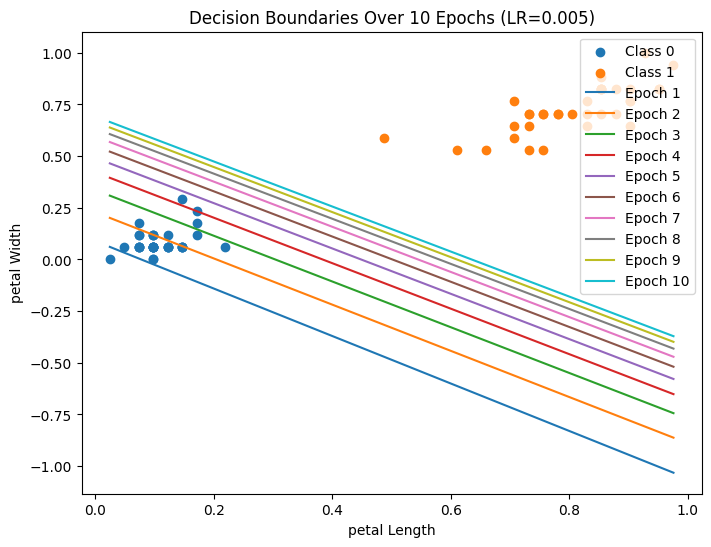

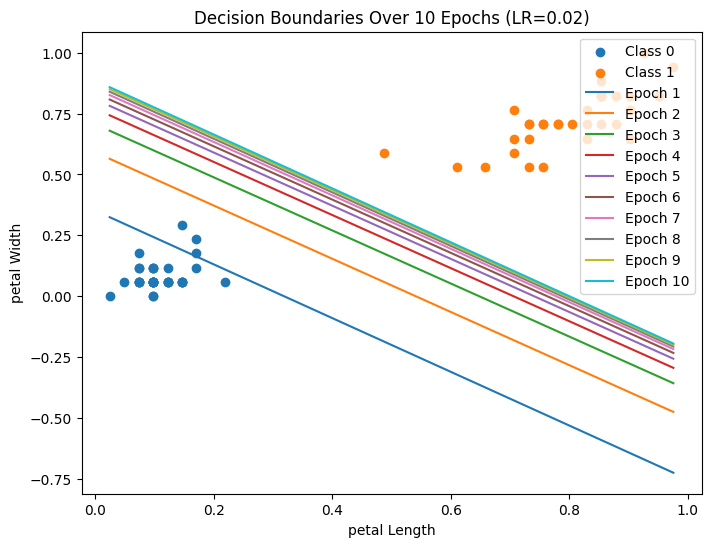

In [61]:
def plot_decision_boundaries_epochs(X, y, weights_list, biases_list, lr):
    plt.figure(figsize=(8, 6))

    for class_label in np.unique(y):
        plt.scatter(X[y == class_label, 0], X[y == class_label, 1], label=f"Class {class_label}")

    x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)

    for epoch in range(10):
        w = weights_list[epoch]
        b = biases_list[epoch]

        if w[0, 1] != 0:
            y_vals = -(w[0, 0] * x_vals + b[0, 0]) / w[0, 1]
            plt.plot(x_vals, y_vals, label=f"Epoch {epoch+1}")

    plt.xlabel("petal Length")
    plt.ylabel("petal Width")
    plt.legend()
    plt.title(f"Decision Boundaries Over 10 Epochs (LR={lr})")
    plt.show()

for lr in learning_rates:
    plot_decision_boundaries_epochs(X_train, y_train, results[lr]["weights"][:10], results[lr]["biases"][:10], lr)


### **Running models on more epochs**

Training with learning rate: 0.001
Epoch 1/50, Error: 0.4896, Accuracy: 55.7143
Epoch 2/50, Error: 0.4754, Accuracy: 51.4286
Epoch 3/50, Error: 0.4622, Accuracy: 51.4286
Epoch 4/50, Error: 0.4499, Accuracy: 57.1429
Epoch 5/50, Error: 0.4383, Accuracy: 58.5714
Epoch 6/50, Error: 0.4273, Accuracy: 65.7143
Epoch 7/50, Error: 0.4169, Accuracy: 71.4286
Epoch 8/50, Error: 0.4069, Accuracy: 80.0000
Epoch 9/50, Error: 0.3974, Accuracy: 87.1429
Epoch 10/50, Error: 0.3883, Accuracy: 91.4286
Epoch 11/50, Error: 0.3795, Accuracy: 92.8571
Epoch 12/50, Error: 0.3710, Accuracy: 92.8571
Epoch 13/50, Error: 0.3628, Accuracy: 95.7143
Epoch 14/50, Error: 0.3548, Accuracy: 95.7143
Epoch 15/50, Error: 0.3471, Accuracy: 95.7143
Epoch 16/50, Error: 0.3396, Accuracy: 95.7143
Epoch 17/50, Error: 0.3323, Accuracy: 97.1429
Epoch 18/50, Error: 0.3252, Accuracy: 97.1429
Epoch 19/50, Error: 0.3183, Accuracy: 98.5714
Epoch 20/50, Error: 0.3116, Accuracy: 98.5714
Epoch 21/50, Error: 0.3050, Accuracy: 98.5714
Epoch 22

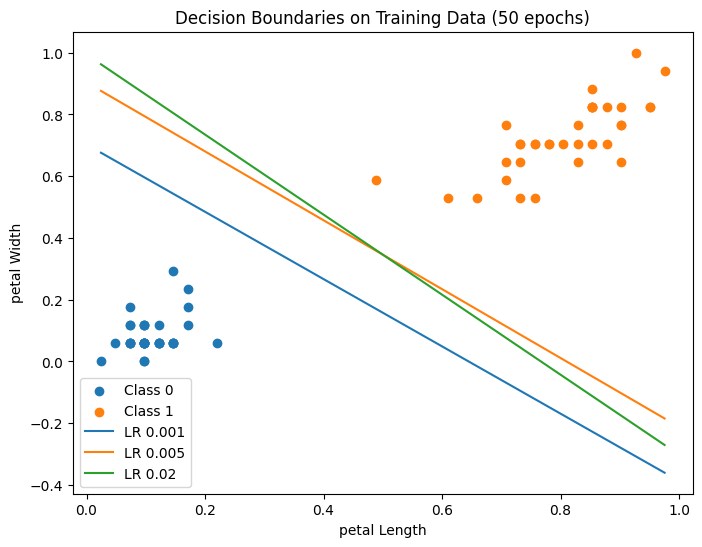

In [62]:
results = {}

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")


    weights, bias, errors, accuracy = adaline_training(X_train, y_train, input_dim=2, output_dim=1, learning_rate=lr, epochs=50)

    results[lr] = {
        "weights": weights,
        "biases": bias,
        "errors": errors,
        "accuracy": accuracy
    }

final_weights = [results[lr]["weights"][-1] for lr in learning_rates]
final_biases = [results[lr]["biases"][-1] for lr in learning_rates]

plot_decision_boundaries(X_train, y_train, final_weights, final_biases, "Decision Boundaries on Training Data (50 epochs)", learning_rates)
